# Data downloading and processing

In [4]:
#!pip3 install datasets
from datasets import load_dataset
data = load_dataset("squad_v2")

Reusing dataset squad_v2 (/Users/arunbabupt/.cache/huggingface/datasets/squad_v2/squad_v2/2.0.0/09187c73c1b837c95d9a249cd97c2c3f1cebada06efe667b4427714b27639b1d)


  0%|          | 0/2 [00:00<?, ?it/s]

In [5]:
data

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 130319
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 11873
    })
})

In [6]:
data['train'][102]

{'id': '56be8e353aeaaa14008c90c9',
 'title': 'Beyoncé',
 'context': 'The remaining band members recorded "Independent Women Part I", which appeared on the soundtrack to the 2000 film, Charlie\'s Angels. It became their best-charting single, topping the U.S. Billboard Hot 100 chart for eleven consecutive weeks. In early 2001, while Destiny\'s Child was completing their third album, Beyoncé landed a major role in the MTV made-for-television film, Carmen: A Hip Hopera, starring alongside American actor Mekhi Phifer. Set in Philadelphia, the film is a modern interpretation of the 19th century opera Carmen by French composer Georges Bizet. When the third album Survivor was released in May 2001, Luckett and Roberson filed a lawsuit claiming that the songs were aimed at them. The album debuted at number one on the U.S. Billboard 200, with first-week sales of 663,000 copies sold. The album spawned other number-one hits, "Bootylicious" and the title track, "Survivor", the latter of which earned

In [6]:
#creating test and train dataframe from raw_data
#df columns = ['context', 'question', 'answer', 'answer_start']

from tqdm import tqdm
import pandas as pd

def get_train_and_test_data_frame(data):
    feature_list = ['context', 'question', 'answer', 'answer_start']
    df_train = pd.DataFrame(columns =feature_list)
    df_test = pd.DataFrame(columns =feature_list)
    
    print('Processing train data...')
    for item in tqdm(data['train']):
        d = []
        d.extend([item['context'], item['question']])
        try: #remove questions with zero answers
            d.extend([ item['answers']['text'][0], item['answers']['answer_start'][0]]) 
        except:
            continue
        df_length = len(df_train)
        df_train.loc[df_length] = d
    
    print('Processing test data...')
    for item in tqdm(data['validation']):
        d = []
        d.extend([item['context'], item['question']])
        try: #remove questions with zero answers
            d.extend([ item['answers']['text'][0], item['answers']['answer_start'][0]]) 
        except:
            continue
        df_length = len(df_test)
        df_test.loc[df_length] = d
        #print(item['answers']['answer_start'][0])

    return df_train, df_test


df_train, df_test = get_train_and_test_data_frame(data)

Processing train data...


100%|██████████████████████████████████| 130319/130319 [12:26<00:00, 174.65it/s]


Processing test data...


100%|████████████████████████████████████| 11873/11873 [00:14<00:00, 818.13it/s]


In [1]:
# save to a pickle file for reuse (optional (1/2))
df_train.to_pickle('data/raw_data/train.pkl')
df_test.to_pickle('data/raw_data/test.pkl')

NameError: name 'df_train' is not defined

In [2]:
# load saved file (optional (2/2))
import pandas as pd

feature_list = ['context', 'question', 'answer', 'answer_start']

df_train = pd.DataFrame(columns =feature_list)
df_test = pd.DataFrame(columns =feature_list)

df_train = pd.read_pickle('data/raw_data/train.pkl')
df_test = pd.read_pickle('data/raw_data/test.pkl')

In [3]:
df_train

,context,question,answer,answer_start
0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?,in the late 1990s,269
1,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What areas did Beyonce compete in when she was...,singing and dancing,207
2,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce leave Destiny's Child and bec...,2003,526
3,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In what city and state did Beyonce grow up?,"Houston, Texas",166
4,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In which decade did Beyonce become famous?,late 1990s,276
...,...,...,...,...
86816,"Kathmandu Metropolitan City (KMC), in order to...",In what US state did Kathmandu first establish...,Oregon,229
86817,"Kathmandu Metropolitan City (KMC), in order to...",What was Yangon previously known as?,Rangoon,414
86818,"Kathmandu Metropolitan City (KMC), in order to...",With what Belorussian city does Kathmandu have...,Minsk,476
86819,"Kathmandu Metropolitan City (KMC), in order to...",In what year did Kathmandu create its initial ...,1975,199


# pre processing

In [7]:
factoid = ['who', 'what', 'when', 'where']

In [48]:
df_new_train = df_train.loc[df_train['answer'].apply(lambda x: len(x.split()) <= 6)]
df_new_train.reset_index(drop=True)

,context,question,answer,answer_start
0,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce start becoming popular?,in the late 1990s,269
1,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,What areas did Beyonce compete in when she was...,singing and dancing,207
2,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,When did Beyonce leave Destiny's Child and bec...,2003,526
3,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In what city and state did Beyonce grow up?,"Houston, Texas",166
4,Beyoncé Giselle Knowles-Carter (/biːˈjɒnseɪ/ b...,In which decade did Beyonce become famous?,late 1990s,276
...,...,...,...,...
77960,"Kathmandu Metropolitan City (KMC), in order to...",In what US state did Kathmandu first establish...,Oregon,229
77961,"Kathmandu Metropolitan City (KMC), in order to...",What was Yangon previously known as?,Rangoon,414
77962,"Kathmandu Metropolitan City (KMC), in order to...",With what Belorussian city does Kathmandu have...,Minsk,476
77963,"Kathmandu Metropolitan City (KMC), in order to...",In what year did Kathmandu create its initial ...,1975,199


In [ ]:
def get_len_questions(df):
        factoid = ['who', 'what', 'when', 'where']
        len_q = {}
        
        for q_type in factoid:
            q_list = df.loc[df['question'].apply(lambda x:  q_type in x.lower().split() )]
            len_q[q_type] = [len(quest.split()) for quest in q_list['question']]
        return(len_q)
        
        
len_q = get_len_questions(df_new_train)

In [106]:
len(len_q['what'])

42929

(0.0, 40.0)

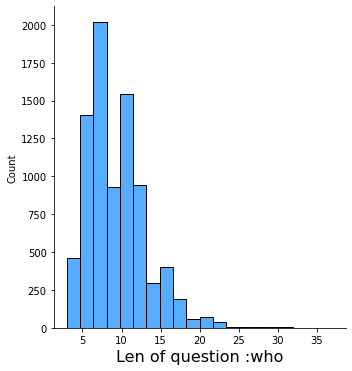

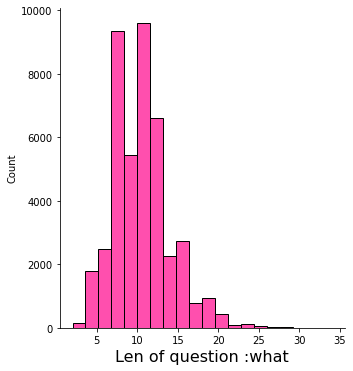

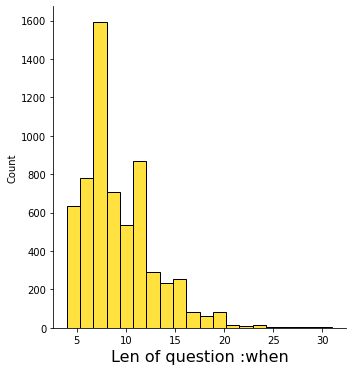

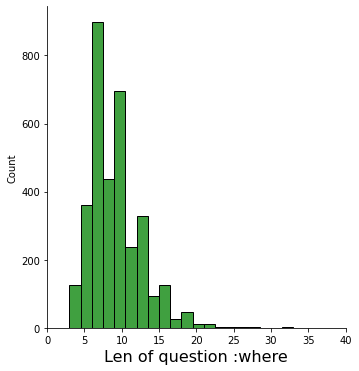

In [115]:
# Import data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# plot
#fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True, dpi=100)
sns.displot(len_q['who'] , color="dodgerblue", bins=20)
plt.xlabel('Len of question :who', fontsize=16)
sns.displot(len_q['what'] , color="deeppink", bins=20)
plt.xlabel('Len of question :what', fontsize=16)
sns.displot(len_q['when'] , color="gold" ,bins=20)
plt.xlabel('Len of question :when', fontsize=16)
sns.displot(len_q['where'] , color="green", bins=20)
plt.xlabel('Len of question :where', fontsize=16)
plt.xlim(0,40)
